Epoch 1/100, Loss: 5.4654
Epoch 2/100, Loss: 3.4579
Epoch 3/100, Loss: 1.8633
Epoch 4/100, Loss: 0.6846
Epoch 5/100, Loss: -0.1794
Epoch 6/100, Loss: -0.8427
Epoch 7/100, Loss: -1.3860
Epoch 8/100, Loss: -1.8535
Epoch 9/100, Loss: -2.2695
Epoch 10/100, Loss: -2.6537
Epoch 11/100, Loss: -3.0168
Epoch 12/100, Loss: -3.3644
Epoch 13/100, Loss: -3.7000
Epoch 14/100, Loss: -4.0261
Epoch 15/100, Loss: -4.3445
Epoch 16/100, Loss: -4.6565
Epoch 17/100, Loss: -4.9632
Epoch 18/100, Loss: -5.2656
Epoch 19/100, Loss: -5.5645
Epoch 20/100, Loss: -5.8604
Epoch 21/100, Loss: -6.1538
Epoch 22/100, Loss: -6.4451
Epoch 23/100, Loss: -6.7345
Epoch 24/100, Loss: -7.0223
Epoch 25/100, Loss: -7.3088
Epoch 26/100, Loss: -7.5943
Epoch 27/100, Loss: -7.8788
Epoch 28/100, Loss: -8.1626
Epoch 29/100, Loss: -8.4457
Epoch 30/100, Loss: -8.7283
Epoch 31/100, Loss: -9.0103
Epoch 32/100, Loss: -9.2920
Epoch 33/100, Loss: -9.5733
Epoch 34/100, Loss: -9.8542
Epoch 35/100, Loss: -10.1349
Epoch 36/100, Loss: -10.4153
Epo

<ipython-input-2-25f597eee28f>:48: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_batch * np.log(sigmoid) + (1 - y_batch) * np.log(1 - sigmoid))
<ipython-input-2-25f597eee28f>:48: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y_batch * np.log(sigmoid) + (1 - y_batch) * np.log(1 - sigmoid))


Epoch 91/100, Loss: nan
Epoch 92/100, Loss: nan
Epoch 93/100, Loss: nan
Epoch 94/100, Loss: nan
Epoch 95/100, Loss: nan
Epoch 96/100, Loss: nan
Epoch 97/100, Loss: nan
Epoch 98/100, Loss: nan
Epoch 99/100, Loss: nan
Epoch 100/100, Loss: nan


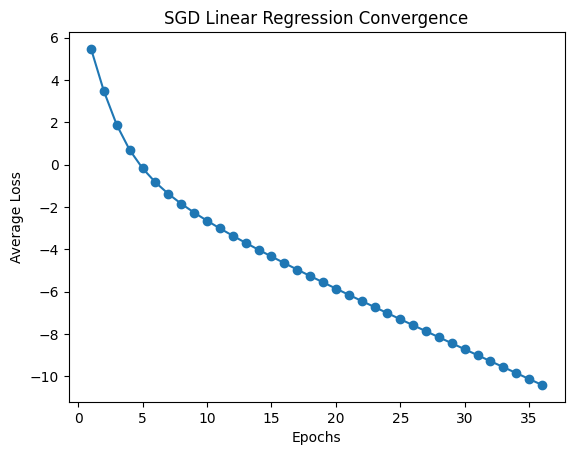

Accuracy on Test Set: 0.9649


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = load_breast_cancer()
X, y = data.data, data.target


scaler = StandardScaler()
X = scaler.fit_transform(X)


X = np.c_[np.ones(X.shape[0]), X]


y = 2 * y - 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_features = X_train.shape[1]
theta = np.random.randn(num_features)
learning_rate = 0.01
num_epochs = 100
batch_size = 32


loss_history = []


for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]


        logits = X_batch.dot(theta)


        sigmoid = 1 / (1 + np.exp(-logits))


        loss = -np.mean(y_batch * np.log(sigmoid) + (1 - y_batch) * np.log(1 - sigmoid))
        gradient = -X_batch.T.dot(y_batch - sigmoid) / batch_size


        theta -= learning_rate * gradient
        total_loss += loss

    avg_loss = total_loss / (X_train.shape[0] / batch_size)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


plt.plot(range(1, num_epochs+1), loss_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.title('SGD Linear Regression Convergence')
plt.show()


logits_test = X_test.dot(theta)
predictions = np.sign(logits_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on Test Set: {accuracy:.4f}")
